<a href="https://colab.research.google.com/github/Abdelmalek-Djemaa/Linear-Regression-with-NumPy-and-Python/blob/main/Linear_Regression_with_NumPy_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Linear Regression with NumPy and Python </h2>

### Task 1: Load the Data and Libraries
---

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
data =  pd.read_csv('/content/bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 2: Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000s vs Population in 10000s')

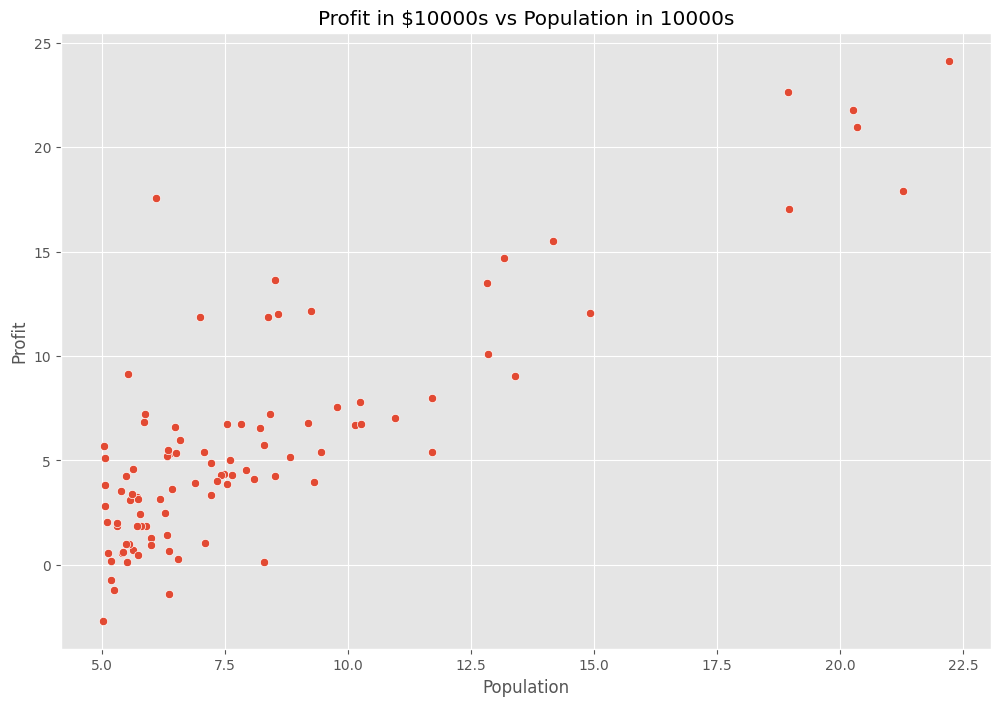

In [24]:
ax = sns.scatterplot(x = "Population", y = "Profit" , data = data)
ax.set_title("Profit in $10000s vs Population in 10000s")

### Task 3: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [30]:
def cost_function(X, y, theta):
  m = len(y)
  predictions = X.dot(theta)
  cost = (1/2*m) * np.sum(np.square(predictions - y))
  return cost

In [31]:
m = data.Population.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1) , axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))
cost_function(X, y, theta)

301772.35305298044

### Task 4: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [34]:
def gradient_decent(X, y, theta , alpha, iterations):
  m =len(y)
  cost_history = np.zeros(iterations)
  for i in range (iterations):
    predictions = X.dot(theta)
    error = np.dot(X.T , (predictions -y))
    theta -= alpha * 1/m * error
    cost_history[i] = cost_function(X, y, theta)
  return theta, cost_history

In [35]:
theta, cost_history = gradient_decent(X, y, theta, alpha = 0.01, iterations = 2000)

In [44]:
print(f"predictions = {theta[0,0]:.2f} * x + {theta[1,0]:.2f} ")

predictions = -3.79 * x + 1.18 


### Task 5: Visualising the Cost Function $J(\theta)$
---

In [45]:
theta1 = np.linspace(-10, 10, 100)
theta2 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta1), len(theta2)))
for i in range(len(theta1)):
  for j in range(len(theta2)):
    t = np.array([theta1[i], theta2[j]])
    cost_values[i, j] = cost_function(X, y, t)

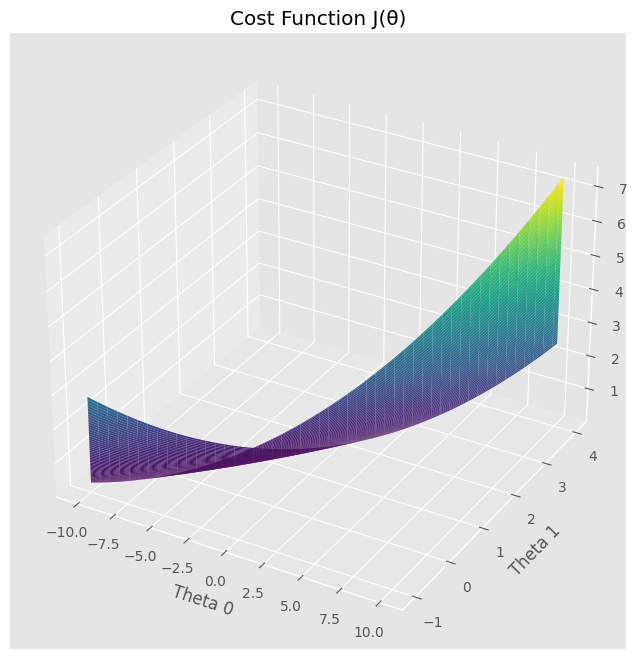

In [51]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta1, theta2, cost_values, cmap='viridis')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function J(θ)')

plt.show()

### Task 6
: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of Cost Function over Iterations of Gradient Descent')

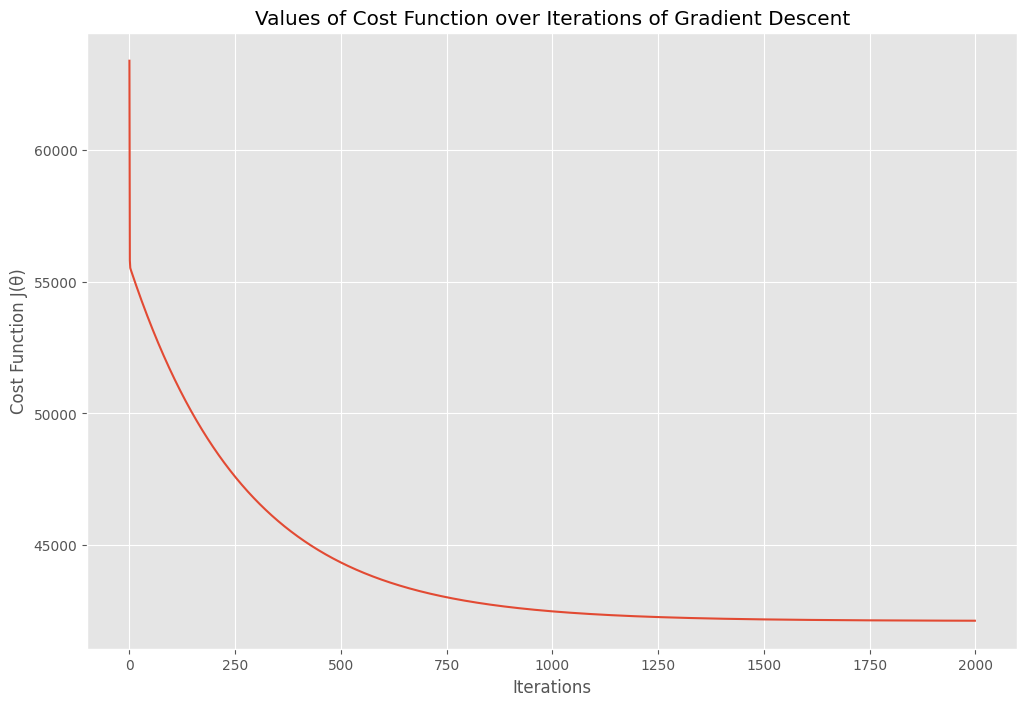

In [53]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost Function J(θ)")
plt.title("Values of Cost Function over Iterations of Gradient Descent")

### Task 7: Training Data with Linear Regression Fit
---

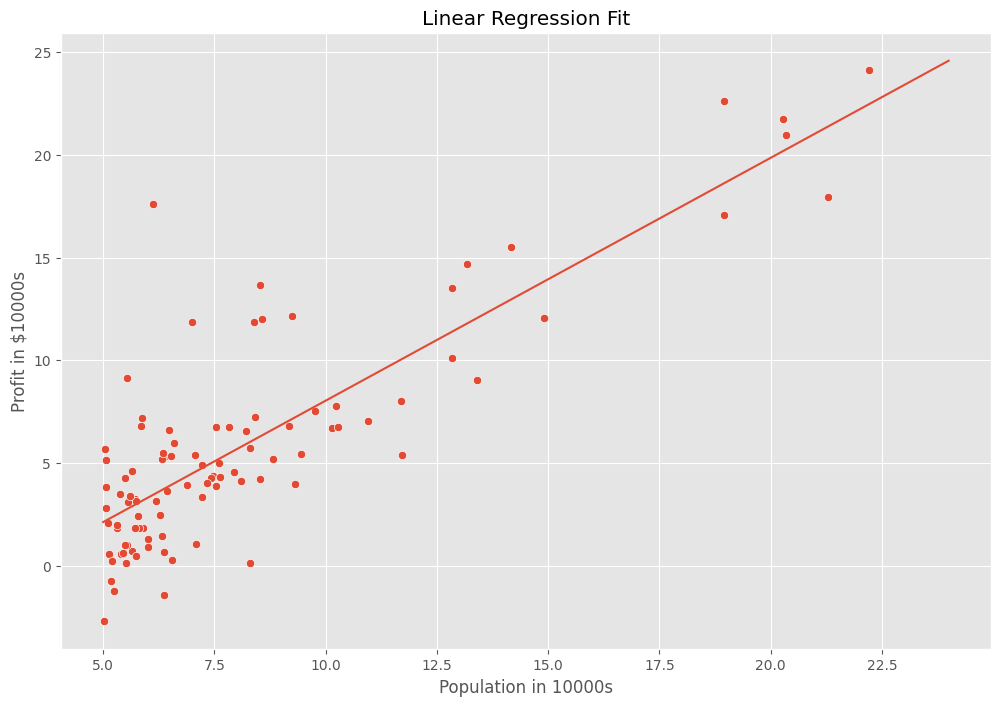

In [59]:
theta = np.squeeze(theta)
ax = sns.scatterplot(x = "Population", y = "Profit" , data = data)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x=x_value, y=y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression Fit")
plt.show()

### Task 8: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [60]:
def predict(x, theta):
  y_pred = np.dot(theta.T, x)
  return y_pred

In [65]:
test = predict(np.array([1, 20]), theta) * 10000
print(f"For population = 200000, we predict a profit of $ {test:.2f}")

For population = 200000, we predict a profit of $ 198561.87
